En este caso se buscó integrar códigos de Python y R en un sólo ambiente, ya que se contaba con procesos de ajuste y graficación de datos de SarsCov-2 en ambos lenguajes, por lo que se empleó el ambiente Colab-Research para unirlos.

#Código de Python para análisis de Olas Covid-19

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat May 29 18:14:34 2021

@author: juan
"""
#===============================================================================
#IMPORTAR MÓDULOS
#===============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import time

import warnings

from scipy.signal import savgol_filter

warnings.filterwarnings("ignore", category=RuntimeWarning) 

start = time.time() #Saves the begining time of the process


#==============================================================================
#LEER DATOS
#==============================================================================
#fecha = '2021-05-25'

casos = pd.read_csv('mediaMovClean50.csv')


poblaciones = pd.read_csv('poblaciones.csv')

#==============================================================================
#ELIMINAR SIN DATO
#==============================================================================

casos = casos[casos.codigo_municipio != 99]

codigoCasos = casos['codigo_municipio']

codigoPob = poblaciones['codigo_municipio']


#==============================================================================
#EXTRAER DATOS POR DEPARTAMENTO
#==============================================================================

departamentos = casos['departamento'].unique()
municipios = casos['municipio'].unique()

casosDepto = {}

for depto in departamentos:
    casosDepto[depto] = pd.DataFrame(casos.loc[casos['departamento'] == depto])
    casosDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    casosDepto[depto] = casosDepto[depto].set_index('municipio')
    
    
pobDepto = {}

for depto in departamentos:
    pobDepto[depto] = pd.DataFrame(poblaciones.loc[poblaciones['departamento'] == depto])
    pobDepto[depto].drop(['codigo_municipio','departamento'], axis = 1, inplace = True)
    pobDepto[depto] = pobDepto[depto].set_index('municipio')
    
#==============================================================================
#CREAR CARPETAS
#==============================================================================

os.makedirs('GraficasOlas',exist_ok=True)
       
os.makedirs('TablerosOlas',exist_ok=True)

#==============================================================================
#Graficas'+str(fecha)+' DEPARTAMENTO
#==============================================================================

fechas = casosDepto['San Jose'].columns.values
fechas1 = fechas[7::14]
fechas2 = fechas1[1:len(fechas1)]


fechas = np.arange(len(fechas))
fechas1 = fechas[0::100]
fechas2 = fechas1[1:len(fechas1)]

ACUMULADOSDEPTO = []
POSITIVIDADDEPTO = []
PRUEBASDEPTO = []
NOMBREDEPTO = []
MIXTODEPTO = []

arrayAcumuladosDepto = []
arrayPositividadDepto = []
arrayPruebasDepto = []
arrayMixtoDepto = []
arrayMediaMovilDepto = []

arrayOlas = []
arrayOlas2 = []
arrayInicioOlas = []

arrayPtoInf1 = []
arrayPtoInf2 = []

diasMediaMovil = 14

Filtro = []
gradoPolinomioFiltro = 3

for depto in departamentos:
    pob = 0
    cantidadMunicipios = len(casosDepto[depto].index)
    mediamovilDepto = np.zeros(len(fechas)-diasMediaMovil)
    mediamovilPruebasDepto = np.zeros(len(fechas)-diasMediaMovil)
    positivosDepto = np.zeros(len(fechas))
    pruebasTotalesDepto = np.zeros(len(fechas))
    acumuladosDepto = np.zeros(len(fechas))
    acumuladosMediaMovilDepto = np.zeros(len(fechas)-diasMediaMovil)
    variacionDepto = np.zeros(len(fechas))
    variacionMediaMovilDepto = np.zeros(len(fechas)-diasMediaMovil)
    ArrayAcumuladosDepto = []
    ArrayPositividadDepto = []
    ArrayPruebasDepto = []
    ArrayMixtoDepto = []
    ArrayMediaMovilDepto = []
    ArrayOlas = []
    ArrayOlas2 = []
    ArrayInicioOlas = []
    ArrayPtoInf1 = []
    ArrayPtoInf2 = []
    variacionfiltro = np.zeros(len(fechas))
    for muni in casosDepto[depto].index:
        
        positivos = casosDepto[depto].loc[muni].values.astype(float)

        
        positivosDepto = positivos + positivosDepto
        

        pob += pobDepto[depto].loc[muni].values[0]
        
    for i in range(len(positivosDepto)-diasMediaMovil):
        mediamovilDepto[i] = np.mean(positivosDepto[i+1:i+diasMediaMovil+1])
    for i in range(len(pruebasTotalesDepto)-diasMediaMovil):
        mediamovilPruebasDepto[i] = np.mean(pruebasTotalesDepto[i+1:i+diasMediaMovil+1])
    for i in range(len(positivosDepto)):
        if i == 0:
            acumuladosDepto[i] = positivosDepto[i]
        else:
            acumuladosDepto[i] = acumuladosDepto[i-1] + positivosDepto[i]
    for i in range(len(variacionDepto)):
        if i == 0:
            variacionDepto[i] = 0
        else:
            variacionDepto[i] = positivosDepto[i] - positivosDepto[i-1]
            
    for i in range(len(acumuladosDepto)-diasMediaMovil):
        acumuladosMediaMovilDepto[i] = np.mean(acumuladosDepto[i+1:i+diasMediaMovil+1])
    
    for i in range(len(variacionDepto)-diasMediaMovil):
        variacionMediaMovilDepto[i] = np.mean(variacionDepto[i+1:i+diasMediaMovil+1])
    
    tasaDepto = mediamovilDepto/pob*100000*diasMediaMovil
    ArrayAcumuladosDepto.extend([depto])
    ArrayAcumuladosDepto.extend(acumuladosDepto)
    arrayAcumuladosDepto.append(ArrayAcumuladosDepto)
    
    ArrayMediaMovilDepto.extend([depto])
    ArrayMediaMovilDepto.extend(['MediaMovil'])
    ArrayMediaMovilDepto.extend(mediamovilDepto)
    arrayMediaMovilDepto.append(ArrayMediaMovilDepto)
    
    ArrayMixtoDepto.extend([depto])
    ArrayMixtoDepto.extend(['Acumulados'])
    ArrayMixtoDepto.extend(acumuladosDepto)
    arrayMixtoDepto.append(ArrayAcumuladosDepto)
    
    ArrayMixtoDepto = []
    
    positividadDepto = mediamovilDepto/mediamovilPruebasDepto * 100
    positividadDepto[np.isnan(positividadDepto)] = 0
    ArrayPositividadDepto.extend([depto])
    ArrayPositividadDepto.extend(positividadDepto)
    arrayPositividadDepto.append(ArrayPositividadDepto)
    
    porcentajePruebasDepto = mediamovilPruebasDepto/pob*1000
    ArrayPruebasDepto.extend([depto])
    ArrayPruebasDepto.extend(porcentajePruebasDepto)
    arrayPruebasDepto.append(ArrayPruebasDepto)

    ArrayMixtoDepto.extend([depto])
    ArrayMixtoDepto.extend(['Positividad'])
    ArrayMixtoDepto.extend(positividadDepto)
    arrayMixtoDepto.append(ArrayPositividadDepto)
    
    
    plt.plot(fechas[diasMediaMovil:],acumuladosMediaMovilDepto/np.max(acumuladosMediaMovilDepto),label='Acumulados')
    plt.plot(fechas[diasMediaMovil:],mediamovilDepto/np.max(mediamovilDepto),label='Derivada')
#    plt.plot(fechas[diasMediaMovil:],variacionMediaMovilDepto/np.max(np.abs(variacionMediaMovilDepto)),label='2da derivada')
    plt.plot(np.ones(len(mediamovilDepto))*0.1)
    plt.xticks(fechas2,rotation = 90)
    plt.grid()
    plt.legend()
    plt.title('Acumulados y derivada - ' + depto)
    plt.ylabel('Acumulados y derivada')
    #plt.xlabel('Fecha \n *Obtenido de la base de datos SIGSA y de las proyecciones de población del INE.')
    #plt.savefig('GraficasOlas'+str(fecha)+'/COLORAcumuladosYDerivada'+ depto + '.svg', bbox_inches='tight')
    plt.savefig('GraficasOlas' + '/COLORAcumuladosYDerivada' + depto + '.svg', bbox_inches='tight')
    plt.close()
    
    senalFiltrada = savgol_filter(positivosDepto/np.max(positivosDepto),101,gradoPolinomioFiltro)
    acumuladosFiltrada = savgol_filter(acumuladosDepto/np.max(acumuladosDepto),101,gradoPolinomioFiltro)
    
    for i in range(len(senalFiltrada)):
        if i == 0:
            variacionfiltro[i] = 0
        else:
            variacionfiltro[i] = senalFiltrada[i] - senalFiltrada[i-1]
            
    dFiltrada = savgol_filter(variacionfiltro/np.max(variacionfiltro),101,gradoPolinomioFiltro)
    
    FinOla = []
    FinOla2 = []
    
    PuntoInflexionOla1 = []
    PuntoInflexionOla2 = []
    
    for i in range(100,len(dFiltrada)):
        if dFiltrada[i-1] < 0 and dFiltrada[i]>0 and acumuladosFiltrada[i-1] > 0.1:
            FinOla.append(i)
            
    Ola1 = list(senalFiltrada[:FinOla[0]])
    PuntoInflexionOla1.append(Ola1.index(max(Ola1)))
    
    for i in range(FinOla[0]+1,len(dFiltrada)):
        res = True in (ele > senalFiltrada[FinOla[0]]*1.2 for ele in senalFiltrada[FinOla[0]+1:i])
        if dFiltrada[i-1] < 0 and dFiltrada[i]>0 and acumuladosFiltrada[i]-acumuladosFiltrada[FinOla[0]]>0.2 and res==True:
            FinOla2.append(i)
    
    if FinOla2 == []:
        FinOla2.append(len(dFiltrada))
    
    Ola2 = list(senalFiltrada[FinOla[0]:FinOla2[0]])
    PuntoInflexionOla2.append(Ola2.index(max(Ola2))+FinOla[0])
    
    ArrayOlas.extend([depto])
    ArrayOlas.extend(['Corte de ola 1 ola 2'])
    ArrayOlas.append(FinOla[0])
    arrayOlas.append(ArrayOlas)
    
    ArrayPtoInf1.extend([depto])
    ArrayPtoInf1.extend(['Punto de inflexión - Ola 1'])
    ArrayPtoInf1.append(PuntoInflexionOla1[0])
    arrayPtoInf1.append(ArrayPtoInf1)
    
    ArrayPtoInf2.extend([depto])
    ArrayPtoInf2.extend(['Punto de inflexión - Ola 2'])
    ArrayPtoInf2.append(PuntoInflexionOla2[0])
    arrayPtoInf2.append(ArrayPtoInf2)
    
    ArrayOlas2.extend([depto])
    ArrayOlas2.extend(['Corte de ola 2 ola 3'])
    ArrayOlas2.append(FinOla2[0])
    arrayOlas2.append(ArrayOlas2)
    
    plt.plot(fechas,acumuladosFiltrada,label='Acumulados')
    plt.plot(fechas,senalFiltrada,label='Derivada')
    plt.title('Filtrada - ' + depto)
    plt.xticks(fechas2,rotation = 90)
    plt.ylabel('Acumulados y derivada')
   # plt.xlabel('Fecha \n *Obtenido de la base de datos SIGSA y de las proyecciones de población del INE.')
    plt.grid()
    plt.legend()
    plt.savefig('GraficasOlas' + '/FILTROAcumuladosYDerivada' + depto + '.svg', bbox_inches='tight')
    plt.close()
    
    plt.plot(fechas[diasMediaMovil:],mediamovilDepto/np.max(mediamovilDepto), label='Media Movil')#positivosDepto/np.max(positivosDepto), label='Sin Filtro')
    plt.plot(fechas[diasMediaMovil:],senalFiltrada[diasMediaMovil:], label='Con Filtro')
    #plt.plot(fechas[diasMediaMovil:],mediamovilDepto/np.max(mediamovilDepto),label='Media Movil')
    plt.axvline(x=FinOla[0], color = 'r', label='Corte Ola1')
    plt.axvline(x=FinOla2[0], color = 'r', label='Corte Ola2')
    plt.axvline(x=PuntoInflexionOla1[0], color = 'g', label = 'Punto Inflexion Ola 1')
    plt.axvline(x=PuntoInflexionOla2[0], color = 'g', label = 'PUnto Inflexion Ola 2')
    plt.title('Comparacion - ' + depto)
    plt.xticks(fechas2,rotation = 90)
    plt.ylabel('Positivos')
    #plt.xlabel('Fecha \n *Obtenido de la base de datos SIGSA y de las proyecciones de población del INE.')
    plt.grid()
    plt.legend()
    #plt.savefig('GraficasOlas'+str(fecha)+'/Comparacion'+ depto + '.svg', bbox_inches='tight')
    plt.savefig('GraficasOlas' + '/Comparacion' + depto + '.svg', bbox_inches='tight')
    plt.close()
    
    plt.plot(fechas[diasMediaMovil:],variacionMediaMovilDepto/np.max(variacionMediaMovilDepto), label='Sin Filtro')
    plt.plot(fechas,variacionfiltro/np.max(variacionfiltro), label='Con Filtro')
    plt.plot(fechas,dFiltrada/np.max(dFiltrada), label='Con Filtro')
    plt.title('Comparacion derivadas - ' + depto)
    plt.xticks(fechas2,rotation = 90)
    plt.ylabel('dPositivos')
    #plt.xlabel('Fecha \n *Obtenido de la base de datos SIGSA y de las proyecciones de población del INE.')
    plt.grid()
    plt.legend()
    #plt.savefig('GraficasOlas'+str(fecha)+'/DerivadasComparacion'+ depto + '.svg', bbox_inches='tight')
    plt.savefig('GraficasOlas' + '/DerivadasComparacion' + depto + '.svg', bbox_inches='tight')
    plt.close()
    
    plt.plot(fechas,acumuladosFiltrada,label='Acumulados')
    plt.plot(fechas,senalFiltrada,label='Derivada')
    plt.plot(fechas,dFiltrada,label='2da derivada')
#    plt.plot(np.ones(len(mediamovilDepto))*0.1)
    plt.xticks(fechas2,rotation = 90)
    plt.grid()
    plt.title('Acumulados y derivada - ' + depto)
    plt.ylabel('Acumulados y derivada')
    #plt.xlabel('Fecha \n *Obtenido de la base de datos SIGSA y de las proyecciones de población del INE.')
    plt.axvline(x=FinOla[0], color = 'r', label='Corte Ola')
    plt.axvline(x=PuntoInflexionOla1[0], color = 'g', label = 'Punto Inflexion Ola 1')
    plt.axvline(x=PuntoInflexionOla2[0], color = 'm', label = 'PUnto Inflexion Ola 2')
    plt.legend()
    #plt.savefig('GraficasOlas'+str(fecha)+'/AcumuladosYDerivadas'+ depto + '.svg', bbox_inches='tight')
    plt.savefig('GraficasOlas' + '/AcumuladosYDerivadas' + depto + '.svg', bbox_inches='tight')
    plt.close()
    
    
DFMediaMovil = pd.DataFrame(arrayMediaMovilDepto)
DFMediaMovil.to_csv('MediaMovil.csv')

DFFinOla1 = pd.DataFrame(arrayOlas)
DFFinOla1.to_csv('FinOla1.csv')

DFFinOla2 = pd.DataFrame(arrayOlas2)
DFFinOla2.to_csv('FinOla2.csv')

DFPuntoInflexion1 = pd.DataFrame(arrayPtoInf1)
DFPuntoInflexion1.to_csv('PuntoInflexionOla1.csv')

DFPuntoInflexion2 = pd.DataFrame(arrayPtoInf2)
DFPuntoInflexion2.to_csv('PuntoInflexionOla2.csv')

tabla_unif = pd.DataFrame()
tabla_unif['departamento'] = casos['departamento']
tabla_unif['F1'] = DFFinOla1[2]
tabla_unif['F2'] = DFFinOla2[2]
tabla_unif['P1'] = DFPuntoInflexion1[2]
tabla_unif['P2'] = DFPuntoInflexion2[2]
tabla_unif.to_csv('cortesOlasCR.csv',index=False)


In [ ]:
import pandas as pd

#casos = pd.read_csv('acumulados_Covid.txt', sep='\s+', decimal=',')
#casos

xls = pd.ExcelFile('params1.xlsx')
xls.sheet_names
data = xls.parse(sheet_name='Hoja1')
data

data.to_csv('params1t.csv',index=False)

In [ ]:
tabla_unif

#Códigos de R para ajuste estadístico y graficación de la primera ola Covid-19

Para el uso de R en el ambiente de Colab-Research se requiere instalar, importar y cargar el módulo *rpy2*. Seguidamente, es necesario escribir el comando %%R al inicio de cada celda en la que se desee emplear dicho lenguaje.

In [ ]:
!pip install rpy2
import rpy2
%load_ext rpy2.ipython

En el siguiente código se ejecuta la rutina de ajustes de Richards con la respectiva graficación de cada provincia de Costa Rica, utilizando los datos crudos.

In [ ]:
%%R

#code
source("RichardsTools2.R")

#Time series
cum.ts    <- cum.CR(day0=50,file="08_05_21_positivos_CR.csv", ts = "cum")# loads cumulative time series starting from day 50
daily.ts  <- cum.CR(day0=50,file="08_05_21_positivos_CR.csv", ts = "daily")# loads daily time series starting from day 50
deptos    <- c("San Jose","Alajuela", "Cartago","Heredia", "Guanacaste","Puntarenas", "Limon") # list of provincias names
cortesOlas  <- read.csv("cortesOlasCR.csv") # loads table with initial and ending days of waves
dia0 <- 50  # we start the fitting on day 50

#### fit analysis for First wave


pfinWave1<- cortesOlas$F1 #final day  1st wave
pfinWave2<- cortesOlas$F2 #final day  2nd wave
pinfl1   <- cortesOlas$P1 #inflection point 1st wave
pinfl2   <- cortesOlas$P2 #inflection point 2nd wave

par.mat<-matrix(0,nrow=7,ncol=4)  #matrix of wave parameters


### loop for  n provincias in CR
for(n in 1:7){
  
  prov  <- n    ### provincia number (1 to 7)
  
  tf       <- pfinWave1[prov]   # tf is the duration in days of the first wave. 
  cum.ts1  <- cum.ts[1:tf,] # truncating the time series
  daily.ts1<- daily.ts[1:tf,]
  beta  <- 0.06   ### inverse of temperature
  carr.cap <- tail(cum.ts1,1)[prov+1]
  
  result   <- richards.fit(guess=c(2,2,carr.cap,log(pinfl1[prov])),tseries=cum.ts1,deptnumber=prov,figure=TRUE)
  
  ### first metropolis    
  current_mval <- result[1]
  r.vec  <- result[2]
  a.vec  <- result[3]
  tc.vec <- tc <- result[5]
  k.vec  <- carr.cap <- result[4]
  lk.means <- c()
  
  
  beta.list <- seq(0.06,0.26,0.01)  #list of temperatures for annealing
  print(result[1])
  for(beta in beta.list){
    lkhd.vec <- c()
    
    for(k in 1:200){
      delta  <- carr.cap*runif(1,-0.05,0.05)
      result <- richards.fit(c(2,2,carr.cap+delta,log(tc)),tseries=cum.ts1,deptnumber=prov,figure=FALSE)
      delta_mval <- result[1]
      r <- runif(1,0,1)
      if( r< exp(-beta*(delta_mval-current_mval))){
        current_mval <- delta_mval
        carr.cap     <- carr.cap+delta
        result.new   <- richards.fit(c(2,2,carr.cap,log(tc)),tseries=cum.ts1,deptnumber=prov,figure=TRUE)
        r.vec <- result.new[2]
        a.vec <- result.new[3]
        k.vec <- result.new[4]
        tc.vec<- result.new[5]
        lkhd.vec <- append(lkhd.vec,result.new[1])
      }
    }
    lk.means <-append(lk.means,mean(lkhd.vec))
  }    
  
  

  k  <- mean(k.vec)
  a  <- mean(a.vec)
  r  <- mean(r.vec)
  tc <- mean(tc.vec)
  par.mat[prov,] <- c(a,r,k,tc)
  
}#end of fitting procedure  


params1 <- par.mat

#### Plot 1st wave with fit results 
tdays  <- length(cum.ts[,1])
tt <- seq(1,tf)
td <- seq(1,tdays)
par(mfrow=c(2,3),oma=c(4,1,1,1),mar=c(4,4,1,1))
for(jj in 1:7){
  a   <- params1[jj,1]
  r	<- params1[jj,2]
  k	<- params1[jj,3]
  tc	<- params1[jj,4]
  wave <-k*r*(1+a*exp(-r*(td-tc)))^(-1/a)/(a+ exp(r*(td-tc)))
  plot(td,daily.ts[,jj+1], cex.lab=1.,cex.axis=.9,type="l",lty=2,lwd=1,bty="l",xlab="",ylab="",col="gray",xlim=c(td[1],td[tdays])) 
  title(ylab="Daily infected",line=2)
  title(xlab="days",line=2)
  points(td,wave,pch=19,cex=0.3,col="blue")
  mtext(deptos[jj], side=3,adj=0.1, font=3,cex=0.6)	
}

In [ ]:
%%R
params1

         [,1]       [,2]      [,3]     [,4]
[1,] 1.000000 0.02502801 76842.026 158.9839
[2,] 1.023204 0.03206365 31636.341 164.4008
[3,] 1.000395 0.02293782 18295.546 202.1303
[4,] 1.000000 0.02592530 22117.533 172.7744
[5,] 2.771434 0.06773208  7479.991 187.0159
[6,] 1.000000 0.02603811 21116.091 203.8082
[7,] 1.000672 0.03925048 12368.043 167.6047


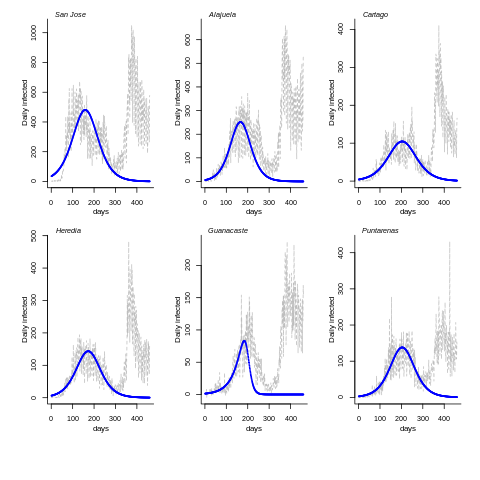

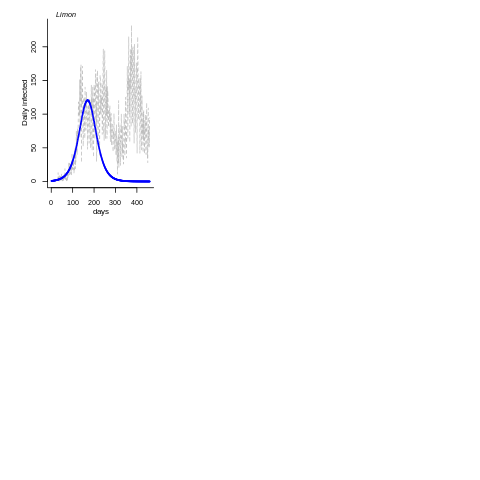

In [ ]:
%%R

tdays  <- length(cum.ts[,1])
tt <- seq(1,tf)
td <- seq(1,tdays)
par(mfrow=c(2,3),oma=c(4,1,1,1),mar=c(4,4,1,1))
for(jj in 1:7){
  a   <- params1[jj,1]
  r	<- params1[jj,2]
  k	<- params1[jj,3]
  tc	<- params1[jj,4]
  wave <-k*r*(1+a*exp(-r*(td-tc)))^(-1/a)/(a+ exp(r*(td-tc)))
  plot(td,daily.ts[,jj+1], cex.lab=1.,cex.axis=.9,type="l",lty=2,lwd=1,bty="l",xlab="",ylab="",col="gray",xlim=c(td[1],td[tdays])) 
  title(ylab="Daily infected",line=2)
  title(xlab="days",line=2)
  points(td,wave,pch=19,cex=0.3,col="blue")
  mtext(deptos[jj], side=3,adj=0.1, font=3,cex=0.6)	
}